# West Coast Wave Energy Capacity Factors from Synthetic Wave Data

Importing Packages

In [1]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5pyd
import rex
import scipy
from scipy import interpolate
from scipy.interpolate import RegularGridInterpolator
import time

Importing power matrix

In [2]:
path='/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/RM6_Power_Matrix_SAM_CSV.csv'
p_matrix = pd.read_csv(path, index_col=0)

Importing location IDs from intersect of areas and NREL coordinates

In [3]:
path='/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/shape_files/NREL_points_intersect_areas/NREL_points_intersect_areas.csv'
intersect_loc_ids = pd.read_csv(path, index_col=0)
intersect_loc_ids = intersect_loc_ids.reset_index(drop=False)
intersect_loc_ids.drop(['Area','Area (m2)','aea (m^2)','area(km^2)'],inplace=True,axis=1)
intersect_loc_ids


,loc_id,lat,lon,id,area(sq.km
0,19699,48.4913,-125.183,1,1285.429
1,19700,48.4771,-125.194,1,1285.429
2,20957,48.4788,-125.173,1,1285.429
3,20958,48.4659,-125.178,1,1285.429
4,20959,48.4522,-125.181,1,1285.429
...,...,...,...,...,...
89181,662450,37.8497,-122.789,70,290.098
89182,663159,37.8562,-122.798,70,290.098
89183,663160,37.8549,-122.794,70,290.098
89184,663161,37.8538,-122.790,70,290.098


In [4]:
intersect_ids = intersect_loc_ids['loc_id'][::10000]
intersect_ids

0         19699
10000    151653
20000    258145
30000    326996
40000    371427
50000    418385
60000    464503
70000    523689
80000    577164
Name: loc_id, dtype: int64

Defining lookup axes and rated power of power matrix

In [5]:
x = p_matrix.index.astype(float)
y = p_matrix.columns.astype(float)
z = p_matrix.values
rated_p = z.max()
xp, yp = np.meshgrid(x,y,sparse=True)

2D interpolation function for imported power matrix

In [6]:
l = RegularGridInterpolator((x, y), z, bounds_error=False)

Extending power matrix

In [7]:
max_Hs = 12.75
max_Te = 30.5
ext_x = np.arange(0, max_Hs, 0.25)
ext_y = np.arange(0, max_Te, 0.25)
xp, yp = np.meshgrid(ext_x,ext_y, sparse=True)
ext_z = l((xp,yp))
ext_p_matrix = pd.DataFrame(ext_z, index=ext_y, columns=ext_x)
ext_p_matrix = ext_p_matrix.T.fillna(method='ffill').fillna(method='bfill').fillna(0)

In [8]:
ext_p_matrix

,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,...,28.00,28.25,28.50,28.75,29.00,29.25,29.50,29.75,30.00,30.25
0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
p_matrix

,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,...,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5,20.5
Hs/Te,,,,,,,,,,,,,,,,,,,,,
0.25,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0.75,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2,0.2,0.2,0.2,0.1,0.1,0.0,0
1.25,0,0,0,0,0.0,0.0,0.0,0.0,4.3,14.7,...,21.3,18.8,16.2,13.0,10.1,7.6,5.7,4.2,3.1,0
1.75,0,0,0,0,0.0,0.0,0.2,35.2,68.4,75.1,...,64.1,55.3,46.6,38.3,30.8,24.1,18.9,14.8,11.6,0
2.25,0,0,0,0,0.0,0.1,26.6,128.3,145.6,142.0,...,120.0,106.1,91.4,76.1,61.2,48.8,39.2,31.4,25.1,0
2.75,0,0,0,0,1.6,0.6,121.3,215.7,229.0,219.9,...,182.0,159.3,137.2,117.0,98.4,81.5,65.3,52.4,42.0,0
3.25,0,0,0,0,19.8,36.5,212.4,288.1,321.7,305.0,...,250.2,220.9,188.3,159.8,133.6,110.3,93.2,77.3,64.1,0
3.75,0,0,0,0,46.3,120.2,212.4,288.1,338.7,350.5,...,319.8,278.8,237.8,202.8,170.4,140.7,119.9,101.5,86.0,0
4.25,0,0,0,0,84.7,142.3,212.4,288.1,338.7,350.5,...,350.3,337.8,284.8,233.4,186.4,149.2,129.5,112.8,98.3,0


Text(0, 0.5, '$H_s\\: (m)$')

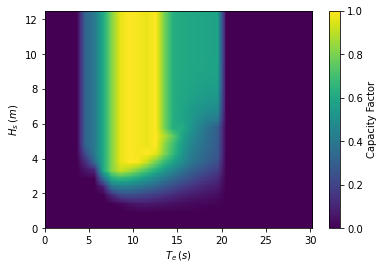

In [10]:
plt.imshow(ext_p_matrix/rated_p, aspect = 'auto', origin='lower', extent=[min(ext_y),max(ext_y),min(ext_x),max(ext_x)])
plt.colorbar(label='Capacity Factor')
plt.xlabel('$T_e\: (s)$')
plt.ylabel('$H_s\: (m)$')


2D interpolation function for extended power matrix

In [11]:
look = RegularGridInterpolator((ext_x, ext_y), ext_p_matrix.values, bounds_error=False)

Importing wave data from NREL API and calculating capacity factors

In [12]:
intersect_ids = [0]

In [13]:
y = 2006

variables = ['significant_wave_height', 'peak_period']
pathAPI = '/nrel/US_wave/West_Coast/West_Coast_wave_2006.h5'
df_list = []
# to do: Replace with for loop over coordindates goes here
for idx in intersect_ids:
    with h5pyd.File(pathAPI, mode='r') as f:
        # Extract time_index and convert to datetime
        time_index = pd.to_datetime(f['time_index'][...].astype(str))
        # Initialize DataFrame to store time-series data
        time_series = pd.DataFrame(index=[time_index])
        # Extract wave height, direction, and period
        new_cols = []
        for var in variables:
            # Get dataset
            ds = f[var]
            # Extract site 100 and add to DataFrame
            print(idx)
            time_series[var] = ds[:, idx]
            new_name = var + '_' + ds.attrs['units']
            new_cols.append(new_name)
    time_series.columns = new_cols
    time_series.loc[:, 'capacity_factor'] = time_series.apply(lambda x: look((x['significant_wave_height_m'],x['peak_period_s']))/rated_p,axis=1)
    time_series.loc[:, 'loc_id'] = idx
    df_list.append(time_series)
    time.sleep(2)
df = pd.concat(df_list, ignore_index=False)
wave_data = df
#output_path='/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/wave_data_syn_2006.csv'
#wave_data.to_csv(output_path,index=True)


0
0


In [14]:
wave_data

,significant_wave_height_m,peak_period_s,capacity_factor,loc_id
2006-01-01 00:00:00+00:00,2.25711,12.1150,0.320274,0
2006-01-01 03:00:00+00:00,2.27147,12.1150,0.324911,0
2006-01-01 06:00:00+00:00,2.30218,12.1150,0.334827,0
2006-01-01 09:00:00+00:00,2.30778,12.1150,0.336636,0
2006-01-01 12:00:00+00:00,2.32414,12.1150,0.341918,0
...,...,...,...,...
2006-12-31 09:00:00+00:00,2.02308,13.3268,0.208680,0
2006-12-31 12:00:00+00:00,1.87933,13.3268,0.171080,0
2006-12-31 15:00:00+00:00,1.71029,12.1150,0.158621,0
2006-12-31 18:00:00+00:00,1.53492,12.1150,0.119668,0


In [34]:
df

,loc_id,significant_wave_height_m,peak_period_s,capacity_factor
0,312809,3.40128,13.326800,0.597327
1,312809,3.53424,13.326800,0.635986
2,312809,3.77443,13.326800,0.705561
3,312809,3.80797,13.326800,0.714954
4,312809,3.85934,13.326800,0.729340
...,...,...,...,...
858475,347193,3.94249,16.125999,0.445535
858476,347193,3.84103,16.125999,0.438990
858477,347193,3.68984,14.659700,0.549418
858478,347193,3.53206,14.659700,0.511596


In [11]:
output_path='/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/wave_data_syn_2006.csv'
wave_data.to_csv(output_path,index=True)

In [14]:
path = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/wave_time_series/wave_data_syn_2006.csv'
wave_data_2006 = pd.read_csv(path, index_col='time')
wave_data_2006

,significant_wave_height_m,peak_period_s,capacity_factor,loc_id
time,,,,
2006-01-01 00:00:00+00:00,3.40128,13.3268,0.597327,312809
2006-01-01 03:00:00+00:00,3.53424,13.3268,0.635986,312809
2006-01-01 06:00:00+00:00,3.77443,13.3268,0.705561,312809
2006-01-01 09:00:00+00:00,3.80797,13.3268,0.714954,312809
2006-01-01 12:00:00+00:00,3.85934,13.3268,0.729340,312809
...,...,...,...,...
2006-12-31 09:00:00+00:00,3.94249,16.1260,0.445535,347193
2006-12-31 12:00:00+00:00,3.84103,16.1260,0.438990,347193
2006-12-31 15:00:00+00:00,3.68984,14.6597,0.549418,347193


In [16]:
first_col = wave_data_2006.pop('loc_id')
wave_data_2006.insert(0,'loc_id',first_col)
wave_data_2006

,loc_id,significant_wave_height_m,peak_period_s,capacity_factor
time,,,,
2006-01-01 00:00:00+00:00,312809,3.40128,13.3268,0.597327
2006-01-01 03:00:00+00:00,312809,3.53424,13.3268,0.635986
2006-01-01 06:00:00+00:00,312809,3.77443,13.3268,0.705561
2006-01-01 09:00:00+00:00,312809,3.80797,13.3268,0.714954
2006-01-01 12:00:00+00:00,312809,3.85934,13.3268,0.729340
...,...,...,...,...
2006-12-31 09:00:00+00:00,347193,3.94249,16.1260,0.445535
2006-12-31 12:00:00+00:00,347193,3.84103,16.1260,0.438990
2006-12-31 15:00:00+00:00,347193,3.68984,14.6597,0.549418


Merging lat and lon coordinates with buoy ID's

In [17]:
path = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/syn_buoy_coordinates.csv'
coordinates = pd.read_csv(path, index_col=None)
coordinates

,loc_id,lat,lon
0,0,48.8641,-125.386
1,1,48.8418,-125.446
2,2,48.8193,-125.504
3,3,48.7972,-125.563
4,4,48.7740,-125.622
...,...,...,...
699899,699899,37.4632,-122.027
699900,699900,37.4617,-122.027
699901,699901,37.4631,-122.026
699902,699902,37.4615,-122.026


In [ ]:
#path = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/wave_time_series/wave_data_syn_2006.csv'
#wave_data_2006 = pd.read_csv(path, index_col='time')
#wave_data_2006

In [18]:
wave_data_2006 = wave_data_2006.reset_index()
wave_data_2006 = pd.merge(wave_data_2006, coordinates, on='loc_id').set_index('time')
third_col = wave_data_2006.pop('lat')
wave_data_2006.insert(1,'lat',third_col)
fourth_col = wave_data_2006.pop('lon')
wave_data_2006.insert(2,'lon',fourth_col)
wave_data_2006

,loc_id,lat,lon,significant_wave_height_m,peak_period_s,capacity_factor
time,,,,,,
2006-01-01 00:00:00+00:00,312809,35.6043,-122.029,3.40128,13.3268,0.597327
2006-01-01 03:00:00+00:00,312809,35.6043,-122.029,3.53424,13.3268,0.635986
2006-01-01 06:00:00+00:00,312809,35.6043,-122.029,3.77443,13.3268,0.705561
2006-01-01 09:00:00+00:00,312809,35.6043,-122.029,3.80797,13.3268,0.714954
2006-01-01 12:00:00+00:00,312809,35.6043,-122.029,3.85934,13.3268,0.729340
...,...,...,...,...,...,...
2006-12-31 09:00:00+00:00,347193,35.4567,-121.525,3.94249,16.1260,0.445535
2006-12-31 12:00:00+00:00,347193,35.4567,-121.525,3.84103,16.1260,0.438990
2006-12-31 15:00:00+00:00,347193,35.4567,-121.525,3.68984,14.6597,0.549418


In [19]:
output_path='/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/wave_time_series/wave_data_syn_2006.csv'
wave_data_2006.to_csv(output_path,index=True)